In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load Nans free and partially column cleaned data
data = pd.read_csv('listings_berlin_null_free.csv')
pd.set_option('display.max_columns', None)
data.head(5)

,id,listing_url,host_id,host_url,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Host_location_germany,Host_location_berlin,host_response_rate_category,bathrooms_type,bathroom_qty
0,2015,https://www.airbnb.com/rooms/2015,2217,https://www.airbnb.com/users/show/2217,2008-08-18,"Key Biscayne, Florida, United States",within an hour,96.0,t,5.0,['email'],t,f,Brunnenstr. Süd,Mitte,52.53305,13.40394,Entire guesthouse,Entire home/apt,2,1.0,2.0,"[""Essentials"", ""Heating"", ""Backyard"", ""Long te...",$53.00,90,1125,2.0,90.0,1125.0,1125.0,84.3,1125.0,t,28,58,64,326,144,10,0,2016-04-11,2021-11-02,4.66,4.79,4.52,4.88,4.90,4.96,4.58,f,4,4,0,0,2.08,False,False,High,private,1.0
1,3176,https://www.airbnb.com/rooms/3176,3718,https://www.airbnb.com/users/show/3718,2008-10-19,"Coledale, New South Wales, Australia",no request,-1.0,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,Prenzlauer Berg Südwest,Pankow,52.53471,13.41810,Entire rental unit,Entire home/apt,4,1.0,2.0,"[""Essentials"", ""Heating"", ""Smoke alarm"", ""Iron...",$90.00,92,1125,92.0,92.0,1125.0,1125.0,92.0,1125.0,t,0,0,0,170,147,1,0,2009-06-20,2021-01-01,4.63,4.68,4.53,4.64,4.69,4.92,4.63,f,1,1,0,0,0.97,False,False,No request,private,1.0
2,7071,https://www.airbnb.com/rooms/7071,17391,https://www.airbnb.com/users/show/17391,2009-05-16,"Berlin, Berlin, Germany",no request,-1.0,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Helmholtzplatz,Pankow,52.54301,13.41534,Private room in rental unit,Private room,2,1.0,2.0,"[""Essentials"", ""Heating"", ""Refrigerator"", ""Hai...",$33.00,1,10,1.0,1.0,10.0,10.0,1.0,10.0,t,0,0,0,0,293,0,0,2009-08-18,2020-03-31,4.83,4.85,4.90,4.86,4.85,4.91,4.71,t,1,0,1,0,1.95,True,True,No request,shared,1.0
3,9991,https://www.airbnb.com/rooms/9991,33852,https://www.airbnb.com/users/show/33852,2009-08-25,"Berlin, Berlin, Germany",no request,-1.0,f,1.0,['email'],t,t,Prenzlauer Berg Südwest,Pankow,52.53269,13.41805,Entire rental unit,Entire home/apt,7,4.0,7.0,"[""Essentials"", ""Children\u2019s dinnerware"", ""...",$180.00,6,14,6.0,6.0,14.0,14.0,6.0,14.0,t,0,0,0,0,8,0,0,2015-08-09,2020-01-04,5.00,5.00,5.00,5.00,5.00,4.86,4.86,f,1,1,0,0,0.10,True,True,No request,private,2.5
4,14325,https://www.airbnb.com/rooms/14325,55531,https://www.airbnb.com/users/show/55531,2009-11-18,"Berlin, Berlin, Germany",within a day,67.0,t,4.0,"['email', 'work_email']",t,t,Prenzlauer Berg Nordwest,Pankow,52.54813,13.40366,Entire rental unit,Entire home/apt,1,0.0,1.0,"[""Ethernet connection"", ""Heating"", ""Coffee mak...",$70.00,95,1125,95.0,95.0,1125.0,1125.0,95.0,1125.0,t,19,19,19,159,26,1,0,2010-06-29,2021-06-21,4.67,5.00,4.84,4.68,4.84,4.58,4.42,f,3,3,0,0,0.19,True,True,Moderate,private,1.0


In [3]:
#host response time is already binned in host_response_rate_category column, can be dropped
data.drop(["host_response_rate"],axis=1, inplace=True)

## dtypes

In [40]:
data.dtypes

id                                                       int64
listing_url                                             object
host_id                                                  int64
host_url                                                object
host_since                                               int64
host_location                                           object
host_response_time                                      object
host_is_superhost                                        int64
host_listings_count                                    float64
host_verifications                                      object
host_has_profile_pic                                     int64
host_identity_verified                                   int64
neighbourhood_cleansed                                  object
neighbourhood_group_cleansed                            object
latitude                                               float64
longitude                                              

In [6]:
#change host_since to datetimeformat and keep only year
data.host_since=pd.to_datetime(data.host_since).dt.year

In [16]:
data  = data.replace({'host_is_superhost': {'t': 1, 
                                'f': 0}})

In [36]:
#convert string t and f which indicates binary but is object to 1s and 0s

#host_is_superhost 
data  = data.replace({'host_is_superhost': {'t': 1, 
                                'f': 0}})
#host_has_profile_pic
data  = data.replace({'host_has_profile_pic': {'t': 1, 
                                'f': 0}})
#host_identity_verified
data  = data.replace({'host_identity_verified': {'t': 1, 
                                'f': 0}})
#has_availability 
data  = data.replace({'has_availability': {'t': 1, 
                                'f': 0}})
#instant_bookable
data  = data.replace({'instant_bookable': {'t': 1, 
                                'f': 0}})

In [30]:
print(data.bedrooms.value_counts()) #can be integer
data.bedrooms=data.bedrooms.astype('int64')

1.0     10134
2.0      1956
0.0      1126
3.0       506
4.0       113
5.0        31
6.0        11
7.0         3
9.0         1
8.0         1
12.0        1
Name: bedrooms, dtype: int64


In [26]:
#beds can be int
data.beds=data.beds.astype('int64')

In [32]:
#price is an object but should be float, also has doller sign and kommas
data['price'] = data['price'].str.replace(',', '')
data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].astype(float)

<ipython-input-32-31eec16e2b74>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace('$', '')


In [39]:
#first review last review should be in datetime format
data.first_review=pd.to_datetime(data.first_review)
data.last_review=pd.to_datetime(data.last_review)

## Categoricals

In [48]:
data.select_dtypes(include=object)

,listing_url,host_url,host_location,host_response_time,host_verifications,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,amenities,host_response_rate_category,bathrooms_type
0,https://www.airbnb.com/rooms/2015,https://www.airbnb.com/users/show/2217,"Key Biscayne, Florida, United States",within an hour,['email'],Brunnenstr. Süd,Mitte,Entire guesthouse,Entire home/apt,"[""Essentials"", ""Heating"", ""Backyard"", ""Long te...",High,private
1,https://www.airbnb.com/rooms/3176,https://www.airbnb.com/users/show/3718,"Coledale, New South Wales, Australia",no request,"['email', 'phone', 'facebook', 'reviews', 'man...",Prenzlauer Berg Südwest,Pankow,Entire rental unit,Entire home/apt,"[""Essentials"", ""Heating"", ""Smoke alarm"", ""Iron...",No request,private
2,https://www.airbnb.com/rooms/7071,https://www.airbnb.com/users/show/17391,"Berlin, Berlin, Germany",no request,"['email', 'phone', 'reviews', 'jumio', 'govern...",Helmholtzplatz,Pankow,Private room in rental unit,Private room,"[""Essentials"", ""Heating"", ""Refrigerator"", ""Hai...",No request,shared
3,https://www.airbnb.com/rooms/9991,https://www.airbnb.com/users/show/33852,"Berlin, Berlin, Germany",no request,['email'],Prenzlauer Berg Südwest,Pankow,Entire rental unit,Entire home/apt,"[""Essentials"", ""Children\u2019s dinnerware"", ""...",No request,private
4,https://www.airbnb.com/rooms/14325,https://www.airbnb.com/users/show/55531,"Berlin, Berlin, Germany",within a day,"['email', 'work_email']",Prenzlauer Berg Nordwest,Pankow,Entire rental unit,Entire home/apt,"[""Ethernet connection"", ""Heating"", ""Coffee mak...",Moderate,private
...,...,...,...,...,...,...,...,...,...,...,...,...
13878,https://www.airbnb.com/rooms/53555107,https://www.airbnb.com/users/show/45133591,"Berlin, Berlin, Germany",within an hour,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Neuköllner Mitte/Zentrum,Neukölln,Entire rental unit,Entire home/apt,"[""Essentials"", ""Baking sheet"", ""Drying rack fo...",High,private
13879,https://www.airbnb.com/rooms/53674313,https://www.airbnb.com/users/show/31473908,"Berlin, Berlin, Germany",within an hour,"['email', 'phone', 'reviews', 'jumio', 'govern...",Neu Lichtenberg,Lichtenberg,Entire rental unit,Entire home/apt,"[""Body soap"", ""Essentials"", ""Baking sheet"", ""E...",High,private
13880,https://www.airbnb.com/rooms/53728542,https://www.airbnb.com/users/show/76954154,"Sarajevo, Federation of Bosnia and Herzegovina...",within an hour,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Schöneberg-Nord,Tempelhof - Schöneberg,Room in hotel,Private room,"[""Essentials"", ""Heating"", ""Smoke alarm"", ""Iron...",High,shared
13881,https://www.airbnb.com/rooms/53728955,https://www.airbnb.com/users/show/39042544,"Berlin, Berlin, Germany",within an hour,"['email', 'phone', 'reviews', 'offline_governm...",Neuköllner Mitte/Zentrum,Neukölln,Entire condominium (condo),Entire home/apt,"[""Washer"", ""Kitchen"", ""Long term stays allowed""]",High,private


### amenities

In [96]:
#is a list of strings
data.amenities

0        ["Essentials", "Heating", "Backyard", "Long te...
1        ["Essentials", "Heating", "Smoke alarm", "Iron...
2        ["Essentials", "Heating", "Refrigerator", "Hai...
3        ["Essentials", "Children\u2019s dinnerware", "...
4        ["Ethernet connection", "Heating", "Coffee mak...
                               ...                        
13878    ["Essentials", "Baking sheet", "Drying rack fo...
13879    ["Body soap", "Essentials", "Baking sheet", "E...
13880    ["Essentials", "Heating", "Smoke alarm", "Iron...
13881     ["Washer", "Kitchen", "Long term stays allowed"]
13882    ["Essentials", "Heating", "Smoke alarm", "Iron...
Name: amenities, Length: 13883, dtype: object

In [ ]:
#each of the amenities would need to go into a seperate column

In [97]:
data['aman']=data.amenities.str.replace("[{}]", "").str.replace('"', "")
#listings['amenities'].head()

<ipython-input-97-4651692a7fba>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['aman']=data.amenities.str.replace("[{}]", "").str.replace('"', "")


In [98]:
A=pd.Series(np.concatenate(data['aman'].map(lambda amns: amns.split(",")))).unique()
len(A)
# we have more than 1000 unqiue ammenities

1169

In [64]:
#keep the ones until a certain threshold
amenities_count=pd.Series(np.concatenate(data['aman'].map(lambda amns: amns.split(",")))).value_counts()
amenities_count

 Kitchen                                                 12974
 Heating                                                 11779
[Essentials                                              11664
 Washer                                                  10803
 Long term stays allowed                                 10367
                                                         ...  
 Bose SoundTouch  sound system with Bluetooth and aux        1
 Tork shampoo                                                1
 KOENIC stainless steel oven                                 1
 different  shampoo                                          1
 Ceranfeld stove                                             1
Length: 1169, dtype: int64

In [109]:
#ammenties which appear more than 20000 times
AA=amenities_count[amenities_count>1000]

In [110]:
unique_ammenities=AA.index

In [111]:
unique_ammenities

Index([' Kitchen', ' Heating', '[Essentials', ' Washer',
       ' Long term stays allowed', ' Hair dryer', ' Wifi', ' Hangers',
       ' Dedicated workspace', ' Iron', ' Smoke alarm',
       ' Dishes and silverware', ' Shampoo', ' Refrigerator',
       ' Cooking basics', ' Hot water', ' Bed linens', ' Stove',
       ' Coffee maker', ' Oven', ' TV', ' Free street parking', ' Wifi]',
       ' Host greets you', ' Microwave', ' Elevator',
       ' Extra pillows and blankets', ' Dishwasher',
       ' Luggage dropoff allowed', ' Private entrance', ' Fire extinguisher',
       ' Carbon monoxide alarm', ' Hot water]', ' Patio or balcony', ' Dryer',
       ' Cable TV', ' Bathtub', ' Lock on bedroom door', ' First aid kit]',
       ' Shower gel', ' Baking sheet', ' Hot water kettle',
       ' Free parking on premises', ' Single level home', ' Dining table',
       ' Freezer', ' Room-darkening shades', ' Wine glasses',
       ' Paid parking off premises]', ' TV with standard cable', ' Toaster',
 

In [112]:
ammenities_list=list(AA.index) #convert index to list

In [113]:
ammenities_list = [s.replace("[", "") for s in ammenities_list]
ammenities_list = [s.replace("]", "") for s in ammenities_list]

In [140]:
ammenities_list

array([' Kitchen', ' Heating', 'Essentials', ' Washer',
       ' Long term stays allowed', ' Hair dryer', ' Wifi', ' Hangers',
       ' Dedicated workspace', ' Iron', ' Smoke alarm',
       ' Dishes and silverware', ' Shampoo', ' Refrigerator',
       ' Cooking basics', ' Hot water', ' Bed linens', ' Stove',
       ' Coffee maker', ' Oven', ' TV', ' Free street parking', ' Wifi',
       ' Host greets you', ' Microwave', ' Elevator',
       ' Extra pillows and blankets', ' Dishwasher',
       ' Luggage dropoff allowed', ' Private entrance',
       ' Fire extinguisher', ' Carbon monoxide alarm', ' Hot water',
       ' Patio or balcony', ' Dryer', ' Cable TV', ' Bathtub',
       ' Lock on bedroom door', ' First aid kit', ' Shower gel',
       ' Baking sheet', ' Hot water kettle', ' Free parking on premises',
       ' Single level home', ' Dining table', ' Freezer',
       ' Room-darkening shades', ' Wine glasses',
       ' Paid parking off premises', ' TV with standard cable',
       ' To

In [115]:
#create array from column and remove unnessecary characters
amenities = np.array(data['amenities'].map(lambda amns: amns.replace('"',"").replace('{',"").replace('}',"").split(',')))

In [136]:
#create array from data column
amenities=np.array(data['aman'])
#create array from most common ammenities
ammenities_list=np.array(ammenities_list)

In [130]:
#fucntion to find most common ammenities in each listing, creating a boolean output
def find_amenties(ammenities_list, amenities):
    amenties_bool = np.empty((amenities.shape[0], ammenities_list.shape[0]))
    for i, row in enumerate(amenities):
        amns = ammenities_list.copy()
        for j, amn in enumerate(amns):
            if amn in amenities[i]:
                amenties_bool[i,j] = True
            else:
                amenties_bool[i,j] = False
    return amenties_bool

In [138]:
#run function
amenities_bool = find_amenties(ammenities_list, amenities)

In [139]:
amenities_bool[1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1.])

In [142]:
df_amenities_bool

,Kitchen,Heating,Essentials,Washer,Long term stays allowed,Hair dryer,Wifi,Hangers,Dedicated workspace,Iron,Smoke alarm,Dishes and silverware,Shampoo,Refrigerator,Cooking basics,Hot water,Bed linens,Stove,Coffee maker,Oven,TV,Free street parking,Wifi,Host greets you,Microwave,Elevator,Extra pillows and blankets,Dishwasher,Luggage dropoff allowed,Private entrance,Fire extinguisher,Carbon monoxide alarm,Hot water,Patio or balcony,Dryer,Cable TV,Bathtub,Lock on bedroom door,First aid kit,Shower gel,Baking sheet,Hot water kettle,Free parking on premises,Single level home,Dining table,Freezer,Room-darkening shades,Wine glasses,Paid parking off premises,TV with standard cable,Toaster,Cleaning products,First aid kit,High chair,Body soap,Essentials,Dishwasher,Drying rack for clothing,Backyard,Crib
0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13878,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
13879,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
13880,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13881,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
data2 = pd.concat([data, df_amenities_bool], sort=False, axis=1)

In [148]:
data2

,id,listing_url,host_id,host_url,host_since,host_location,host_response_time,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Host_location_germany,Host_location_berlin,host_response_rate_category,bathrooms_type,bathroom_qty,aman,Kitchen,Heating,Essentials,Washer,Long term stays allowed,Hair dryer,Wifi,Hangers,Dedicated workspace,Iron,Smoke alarm,Dishes and silverware,Shampoo,Refrigerator,Cooking basics,Hot water,Bed linens,Stove,Coffee maker,Oven,TV,Free street parking,Wifi,Host greets you,Microwave,Elevator,Extra pillows and blankets,Dishwasher,Luggage dropoff allowed,Private entrance,Fire extinguisher,Carbon monoxide alarm,Hot water,Patio or balcony,Dryer,Cable TV,Bathtub,Lock on bedroom door,First aid kit,Shower gel,Baking sheet,Hot water kettle,Free parking on premises,Single level home,Dining table,Freezer,Room-darkening shades,Wine glasses,Paid parking off premises,TV with standard cable,Toaster,Cleaning products,First aid kit,High chair,Body soap,Essentials,Dishwasher,Drying rack for clothing,Backyard,Crib
0,2015,https://www.airbnb.com/rooms/2015,2217,https://www.airbnb.com/users/show/2217,1970,"Key Biscayne, Florida, United States",within an hour,1,5.0,['email'],1,0,Brunnenstr. Süd,Mitte,52.533050,13.403940,Entire guesthouse,Entire home/apt,2,1,2,"[""Essentials"", ""Heating"", ""Backyard"", ""Long te...",53.0,90,1125,2.0,90.0,1125.0,1125.0,84.3,1125.0,1,28,58,64,326,144,10,0,2016-04-11,2021-11-02,4.66,4.79,4.52,4.88,4.90,4.96,4.58,0,4,4,0,0,2.08,False,False,High,private,1.0,"[Essentials, Heating, Backyard, Long term stay...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,3176,https://www.airbnb.com/rooms/3176,3718,https://www.airbnb.com/users/show/3718,1970,"Coledale, New South Wales, Australia",no request,0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",1,1,Prenzlauer Berg Südwest,Pankow,52.534710,13.418100,Entire rental unit,Entire home/apt,4,1,2,"[""Essentials"", ""Heating"", ""Smoke alarm"", ""Iron...",90.0,92,1125,92.0,92.0,1125.0,1125.0,92.0,1125.0,1,0,0,0,170,147,1,0,2009-06-20,2021-01-01,4.63,4.68,4.53,4.64,4.69,4.92,4.63,0,1,1,0,0,0.97,False,False,No request,private,1.0,"[Essentials, Heating, Smoke alarm, Iron, Washe...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7071,https://www.airbnb.com/rooms/7071,17391,https://www.airbnb.com/users/show/17391,1970,"Berlin, Berlin, Germany",no request,1,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,Helmholtzplatz,Pankow,52.543010,13.415340,Private room in rental unit,Private room,2,1,2,"[""Essentials"", ""Heating"", ""Refrigerator"", ""Hai...",33.0,1,10,1.0,1.0,10.0,10.0,1.0,10.0,1,0,0,0,0,293,0,0,2009-08-18,2020-03-31,4.83,4.85,4.90,4.86,4.85,4.91,4.71,1,1,0,1,0,1.95,True,True,No request,sh

### host_verifications

In [143]:
data

,id,listing_url,host_id,host_url,host_since,host_location,host_response_time,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Host_location_germany,Host_location_berlin,host_response_rate_category,bathrooms_type,bathroom_qty,aman
0,2015,https://www.airbnb.com/rooms/2015,2217,https://www.airbnb.com/users/show/2217,1970,"Key Biscayne, Florida, United States",within an hour,1,5.0,['email'],1,0,Brunnenstr. Süd,Mitte,52.533050,13.403940,Entire guesthouse,Entire home/apt,2,1,2,"[""Essentials"", ""Heating"", ""Backyard"", ""Long te...",53.0,90,1125,2.0,90.0,1125.0,1125.0,84.3,1125.0,1,28,58,64,326,144,10,0,2016-04-11,2021-11-02,4.66,4.79,4.52,4.88,4.90,4.96,4.58,0,4,4,0,0,2.08,False,False,High,private,1.0,"[Essentials, Heating, Backyard, Long term stay..."
1,3176,https://www.airbnb.com/rooms/3176,3718,https://www.airbnb.com/users/show/3718,1970,"Coledale, New South Wales, Australia",no request,0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",1,1,Prenzlauer Berg Südwest,Pankow,52.534710,13.418100,Entire rental unit,Entire home/apt,4,1,2,"[""Essentials"", ""Heating"", ""Smoke alarm"", ""Iron...",90.0,92,1125,92.0,92.0,1125.0,1125.0,92.0,1125.0,1,0,0,0,170,147,1,0,2009-06-20,2021-01-01,4.63,4.68,4.53,4.64,4.69,4.92,4.63,0,1,1,0,0,0.97,False,False,No request,private,1.0,"[Essentials, Heating, Smoke alarm, Iron, Washe..."
2,7071,https://www.airbnb.com/rooms/7071,17391,https://www.airbnb.com/users/show/17391,1970,"Berlin, Berlin, Germany",no request,1,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,Helmholtzplatz,Pankow,52.543010,13.415340,Private room in rental unit,Private room,2,1,2,"[""Essentials"", ""Heating"", ""Refrigerator"", ""Hai...",33.0,1,10,1.0,1.0,10.0,10.0,1.0,10.0,1,0,0,0,0,293,0,0,2009-08-18,2020-03-31,4.83,4.85,4.90,4.86,4.85,4.91,4.71,1,1,0,1,0,1.95,True,True,No request,shared,1.0,"[Essentials, Heating, Refrigerator, Hair dryer..."
3,9991,https://www.airbnb.com/rooms/9991,33852,https://www.airbnb.com/users/show/33852,1970,"Berlin, Berlin, Germany",no request,0,1.0,['email'],1,1,Prenzlauer Berg Südwest,Pankow,52.532690,13.418050,Entire rental unit,Entire home/apt,7,4,7,"[""Essentials"", ""Children\u2019s dinnerware"", ""...",180.0,6,14,6.0,6.0,14.0,14.0,6.0,14.0,1,0,0,0,0,8,0,0,2015-08-09,2020-01-04,5.00,5.00,5.00,5.00,5.00,4.86,4.86,0,1,1,0,0,0.10,True,True,No request,private,2.5,"[Essentials, Children\u2019s dinnerware, High ..."
4,14325,https://www.airbnb.com/rooms/14325,55531,https://www.airbnb.com/users/show/55531,1970,"Berlin, Berlin, Germany",within a day,1,4.0,"['email', 'work_email']",1,1,Prenzlauer Berg Nordwest,Pankow,52.548130,13.403660,Entire rental unit,Entire home/apt,1,0,1,"[""Ethernet connection"", ""Heating"", ""Coffee mak...",70.0,95,1125,95.0,95.0,1125.0,1125.0,95.0,1125.0,1,19,19,19,159,26,1,0,2010-06-29,2021-06-21,4.67,5.00,4.84,4.68,4.84,4.58,4.42,0,3,3,0,0,0.19,True,True,Moderate,private,1.0,"[Ethernet connection, Heating, Coffee maker, S..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [144]:
#data.to_csv('data_cluster_test.csv',index=False) #without ammenities transfromed

In [149]:
data2.to_csv('data_cluster_test2.csv',index=False) #with ammenities transfromed

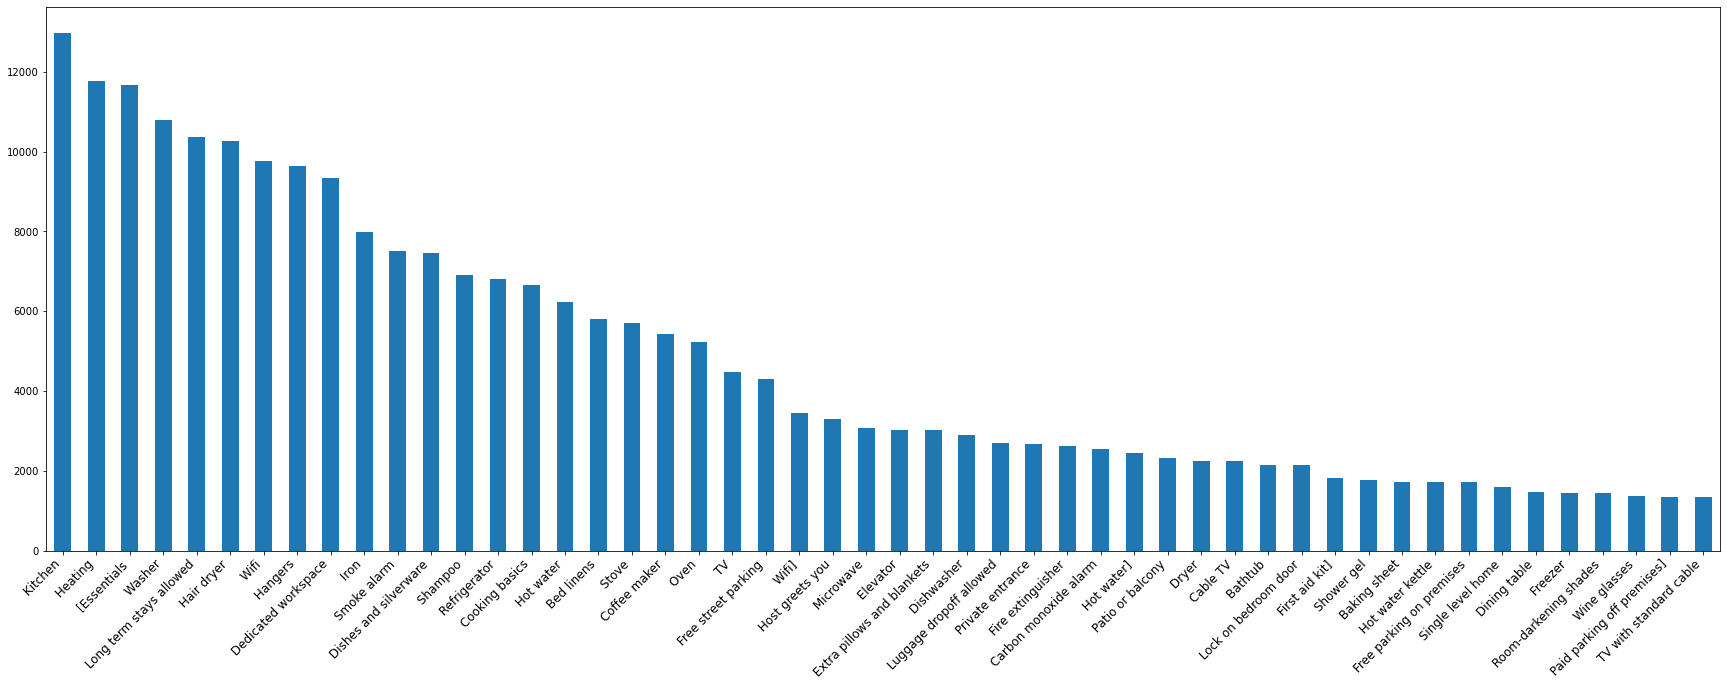

In [152]:
#50 most common ammenities
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
pd.Series(np.concatenate(data['aman'].map(lambda amns: amns.split(","))))\
    .value_counts().head(50)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();